## This project is a part of the Data Science virtual internship program offered by Forage with British Airways.

### The task is to do Web scraping to gain company insights

In [1]:
#import the libraries
import requests

In [2]:
from bs4 import BeautifulSoup
import pandas as pd

In [3]:
#webscrapping with the help of BeautifulSoup
# Customer review data for Britis Airways was collected from Skytrax.

base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []


for i in range(1 , pages+1):
    print(f"Scrape Pages {i}")
    url = f"{base_url}/page/{i}/?sortby = post_data%3ADesc&pagesize={page_size}"
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scrape Pages 1
   ---> 100 total reviews
Scrape Pages 2
   ---> 200 total reviews
Scrape Pages 3
   ---> 300 total reviews
Scrape Pages 4
   ---> 400 total reviews
Scrape Pages 5
   ---> 500 total reviews
Scrape Pages 6
   ---> 600 total reviews
Scrape Pages 7
   ---> 700 total reviews
Scrape Pages 8
   ---> 800 total reviews
Scrape Pages 9
   ---> 900 total reviews
Scrape Pages 10
   ---> 1000 total reviews


In [4]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | 8 months have passed and st...
1,✅ Trip Verified | In June my flight was cance...
2,✅ Trip Verified | Ground and cabin crew alway...
3,✅ Trip Verified | My family flew from Washing...
4,✅ Trip Verified | Easy check in a T5. Galleri...


In [6]:
#Creating a csv file with location 
df.to_csv("C:/Users/Lenovo/Downloads/British airways/BA_reviews.csv")

In [7]:
data = pd.read_csv("C:/Users/Lenovo/Downloads/British airways/BA_reviews.csv")
data

,Unnamed: 0,reviews
0,0,✅ Trip Verified | 8 months have passed and st...
1,1,✅ Trip Verified | In June my flight was cance...
2,2,✅ Trip Verified | Ground and cabin crew alway...
3,3,✅ Trip Verified | My family flew from Washing...
4,4,✅ Trip Verified | Easy check in a T5. Galleri...
...,...,...
995,995,✅ Trip Verified | Manchester to Philadelphia ...
996,996,✅ Trip Verified | Bangkok to London. Seating ...
997,997,✅ Trip Verified | London to Toronto. 14 day t...
998,998,✅ Trip Verified | London to Vienna. I was sho...


In [8]:
#will show the first five rows
data.head(5)

,Unnamed: 0,reviews
0,0,✅ Trip Verified | 8 months have passed and st...
1,1,✅ Trip Verified | In June my flight was cance...
2,2,✅ Trip Verified | Ground and cabin crew alway...
3,3,✅ Trip Verified | My family flew from Washing...
4,4,✅ Trip Verified | Easy check in a T5. Galleri...


In [9]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1000 non-null   int64 
 1   reviews     1000 non-null   object
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [10]:
data.describe()

,Unnamed: 0
count,1000.000000
mean,499.500000
std,288.819436
min,0.000000
25%,249.750000
50%,499.500000
75%,749.250000
max,999.000000


In [22]:
#Accesses the "reviews" column of the DataFrame.
#lambda function checks if "Trip Verified" is present in the review and returns either True or False.
data['verified'] = data['reviews'].apply(lambda review: "Trip Verified" in review)
data['verified']

0      True
1      True
2      True
3      True
4      True
       ... 
995    True
996    True
997    True
998    True
999    True
Name: verified, Length: 1000, dtype: bool

In [23]:
#random data sampling using a specific column ('verified')
data_sample = data["verified"].sample(n=10)
data_sample

238     True
832     True
844     True
635     True
44      True
3       True
625     True
602     True
216    False
787     True
Name: verified, dtype: bool

## Data Cleaning
####Cleaning reviews

In [40]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [44]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...


True

In [49]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# remove the substring "✅ Trip Verified |" from the beginning of each review.

data = data.reviews.str.strip("✅ Trip Verified |")
data

,Unnamed: 0,reviews,verified,cleaned_reviews
0,0,✅ Trip Verified | 8 months have passed and st...,True,trip verified month passed still wasting time ...
1,1,✅ Trip Verified | In June my flight was cance...,True,trip verified june flight cancelled within thr...
2,2,✅ Trip Verified | Ground and cabin crew alway...,True,trip verified ground cabin crew always provide...
3,3,✅ Trip Verified | My family flew from Washing...,True,trip verified family flew washington london br...
4,4,✅ Trip Verified | Easy check in a T5. Galleri...,True,trip verified easy check gallery south north l...
...,...,...,...,...
995,995,✅ Trip Verified | Manchester to Philadelphia ...,True,trip verified manchester philadelphia via lond...
996,996,✅ Trip Verified | Bangkok to London. Seating ...,True,trip verified bangkok london seating interior ...
997,997,✅ Trip Verified | London to Toronto. 14 day t...,True,trip verified london toronto day trip play gol...
998,998,✅ Trip Verified | London to Vienna. I was sho...,True,trip verified london vienna shocked ba provide...


In [50]:
# Convert to lowercase
data['cleaned_reviews'] = data['reviews'].str.lower()

# Remove special characters and punctuation
data['cleaned_reviews'] = data['cleaned_reviews'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))

# Tokenization
data['cleaned_reviews'] = data['cleaned_reviews'].apply(word_tokenize)

# Remove stopwords
stop_words = set(stopwords.words('english'))
data['cleaned_reviews'] = data['cleaned_reviews'].apply(lambda x: [word for word in x if word not in stop_words])

# Lemmatization
lemmatizer = WordNetLemmatizer()
data['cleaned_reviews'] = data['cleaned_reviews'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

# Join tokens back into cleaned text
data['cleaned_reviews'] = data['cleaned_reviews'].apply(lambda x: ' '.join(x))


In [47]:
data.head()

,Unnamed: 0,reviews,verified,cleaned_reviews
0,0,✅ Trip Verified | 8 months have passed and st...,True,trip verified month passed still wasting time ...
1,1,✅ Trip Verified | In June my flight was cance...,True,trip verified june flight cancelled within thr...
2,2,✅ Trip Verified | Ground and cabin crew alway...,True,trip verified ground cabin crew always provide...
3,3,✅ Trip Verified | My family flew from Washing...,True,trip verified family flew washington london br...
4,4,✅ Trip Verified | Easy check in a T5. Galleri...,True,trip verified easy check gallery south north l...


In [51]:
data.isnull().value_counts()


Unnamed: 0  reviews  verified  cleaned_reviews
False       False    False     False              1000
dtype: int64

In [54]:
data.shape

(1000, 4)

In [55]:
data.reset_index(drop=True)


,Unnamed: 0,reviews,verified,cleaned_reviews
0,0,✅ Trip Verified | 8 months have passed and st...,True,trip verified month passed still wasting time ...
1,1,✅ Trip Verified | In June my flight was cance...,True,trip verified june flight cancelled within thr...
2,2,✅ Trip Verified | Ground and cabin crew alway...,True,trip verified ground cabin crew always provide...
3,3,✅ Trip Verified | My family flew from Washing...,True,trip verified family flew washington london br...
4,4,✅ Trip Verified | Easy check in a T5. Galleri...,True,trip verified easy check gallery south north l...
...,...,...,...,...
995,995,✅ Trip Verified | Manchester to Philadelphia ...,True,trip verified manchester philadelphia via lond...
996,996,✅ Trip Verified | Bangkok to London. Seating ...,True,trip verified bangkok london seating interior ...
997,997,✅ Trip Verified | London to Toronto. 14 day t...,True,trip verified london toronto day trip play gol...
998,998,✅ Trip Verified | London to Vienna. I was sho...,True,trip verified london vienna shocked ba provide...


In [57]:
data.to_csv("C:/Users/Lenovo/Downloads/British airways/cleaned-BA-reviews.csv")


In [58]:
df = pd.read_csv("C:/Users/Lenovo/Downloads/British airways/cleaned-BA-reviews.csv")

In [61]:
pip install wordcloud

     -------------------------------------- 153.3/153.3 kB 9.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [73]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns


In [77]:
# Combine all reviews into a single text
all_reviews = ' '.join(df['cleaned_reviews'])

# Create a WordCloud object
wordcloud = WordCloud(width=600, height=600, background_color='white', min_font_size=10).generate(all_reviews)


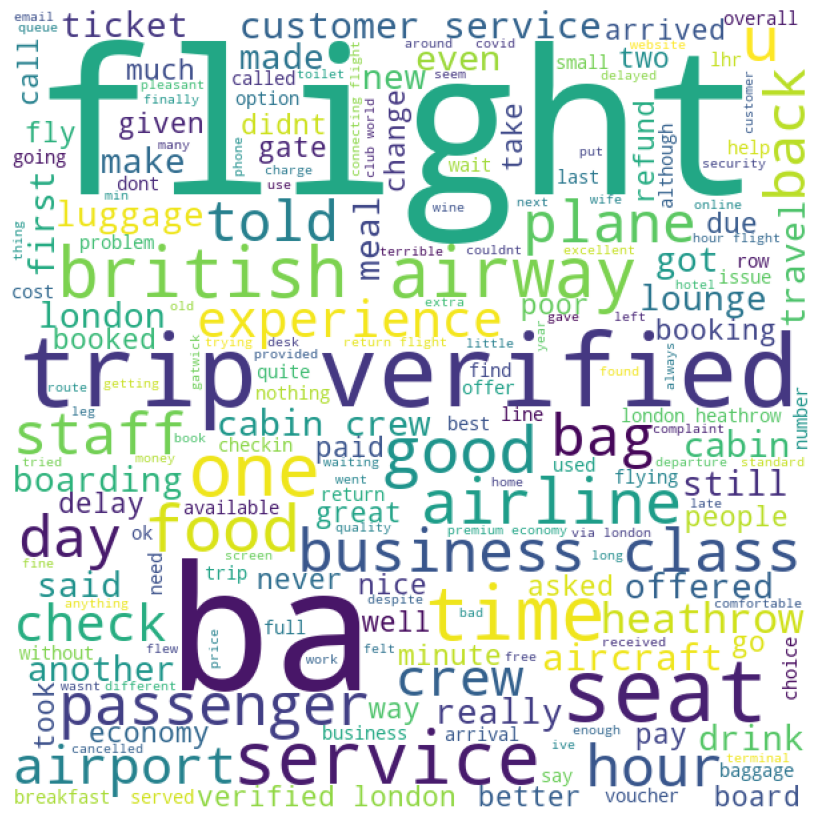

In [78]:
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


## Certain words, like "passenger" and "flight," don't contribute significantly to determining whether a review is positive or negative. Therefore, they can be considered non-informative words and added to a list of stopwords. These words lack conclusive value in discerning sentiment and can be safely excluded during text analysis.

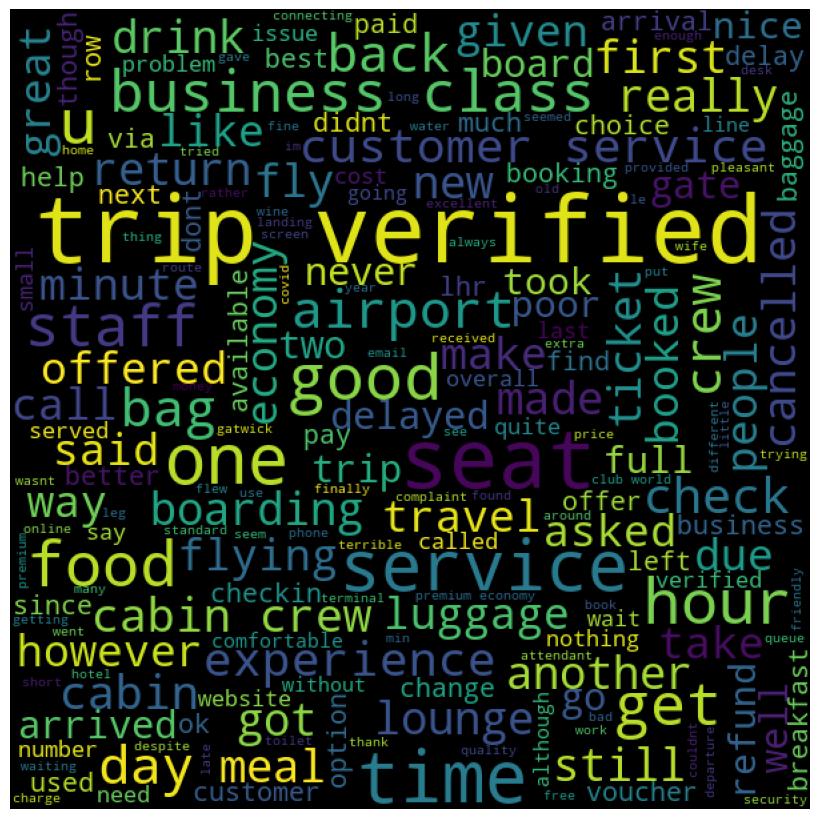

In [86]:
from nltk.corpus import stopwords

# Combine all cleaned reviews into a single text
all_reviews = ' '.join(df['cleaned_reviews'])

# Update stopwords to include additional words
stopwords = set(stopwords.words('english'))
stopwords.update(["ba", "flight", "british", "airway", "airline", "plane", "told", "also", "passenger", "london", "heathrow", "aircraft", "could", "even", "would"])

# Generate the WordCloud
wordcloud = WordCloud(width=600, height=600, background_color='black', min_font_size=10, stopwords=stopwords).generate(all_reviews)

# Display the WordCloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


In [90]:
from nltk import ngrams
from nltk.probability import FreqDist

from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer

# Transform the text of all reviews into a list of individual words.
words = all_reviews.split(" ")
stopwords = text.ENGLISH_STOP_WORDS.union(['Trip','Verified','flight', 'ba', "passenger","u", "london","airway","british","airline",\
                                           "heathrow","plane","lhr","review"])


new_words = [word for word in words if word not in stopwords]

nlp_words=FreqDist(new_words).most_common(20)

all_fdist = pd.Series(dict(nlp_words))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'verified'),
  Text(1, 0, 'trip'),
  Text(2, 0, 'seat'),
  Text(3, 0, 'service'),
  Text(4, 0, 'time'),
  Text(5, 0, 'hour'),
  Text(6, 0, 'crew'),
  Text(7, 0, 'food'),
  Text(8, 0, 'good'),
  Text(9, 0, 'class'),
  Text(10, 0, 'staff'),
  Text(11, 0, 'cabin'),
  Text(12, 0, 'business'),
  Text(13, 0, 'customer'),
  Text(14, 0, 'day'),
  Text(15, 0, 'economy'),
  Text(16, 0, 'bag'),
  Text(17, 0, 'boarding'),
  Text(18, 0, 'told'),
  Text(19, 0, 'airport')])

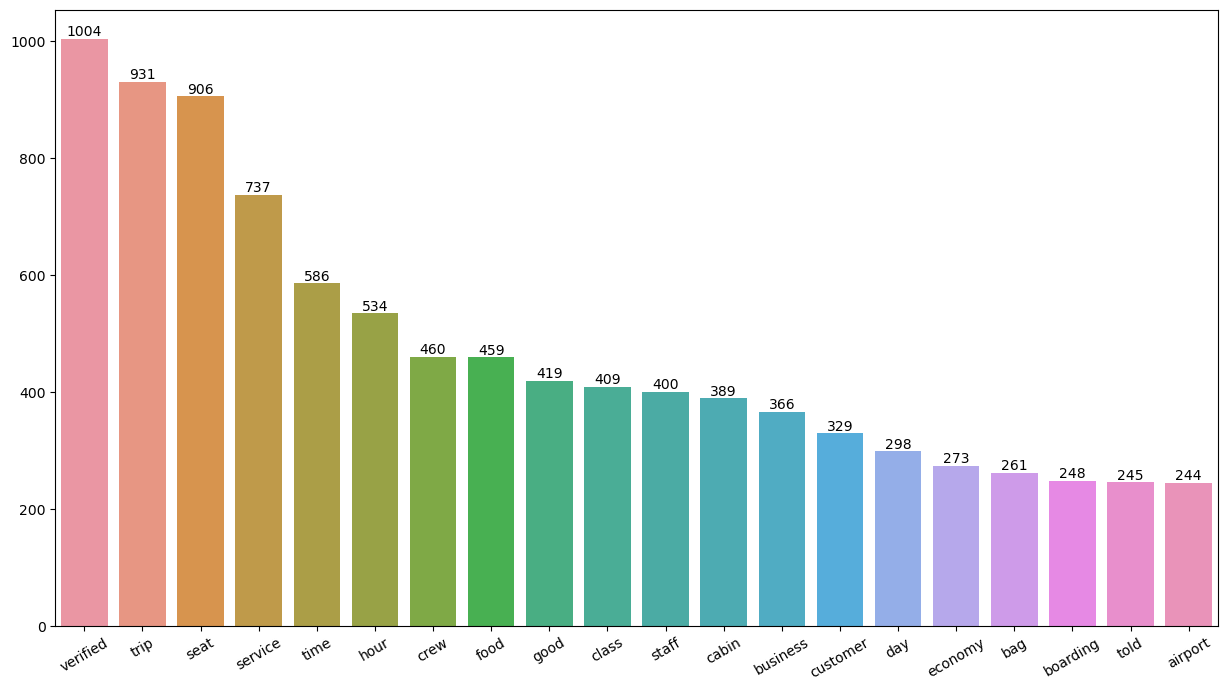

In [91]:
fig, ax = plt.subplots(figsize=(15,8))

# Creating plots using Seaborn with Pandas attributes while rotating x-axis tick labels for improved visibility.

all_plot = sns.barplot(x=all_fdist.index, y=all_fdist.values, ax=ax)
all_plot.bar_label(all_plot.containers[0])
plt.xticks(rotation=30)


In [94]:
pip install textblob


     ------------------------------------ 636.8/636.8 kB 953.6 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [95]:

from textblob import TextBlob

positive_count = 0
negative_count = 0
neutral_count = 0

for review in df['cleaned_reviews']:
    blob = TextBlob(review)
    polarity = blob.sentiment.polarity

    if polarity > 0:
        positive_count += 1
    elif polarity < 0:
        negative_count += 1
    else:
        neutral_count += 1

total_reviews = len(df)
positive_percentage = (positive_count / total_reviews) * 100
negative_percentage = (negative_count / total_reviews) * 100
neutral_percentage = (neutral_count / total_reviews) * 100

print("Positive Reviews: {:.2f}%".format(positive_percentage))
print("Negative Reviews: {:.2f}%".format(negative_percentage))
print("Neutral Reviews: {:.2f}%".format(neutral_percentage))


Positive Reviews: 64.50%
Negative Reviews: 34.00%
Neutral Reviews: 1.50%
